# Week 8: Supervised Learning Last Part


### Decision Tree

In [9]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. These questions are similar to the questions you might ask in a game of 20 Questions. Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is “yes,” you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals — for example, asking whether the animal has fins. This series of questions can be expressed as a decision tree, as shown in

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

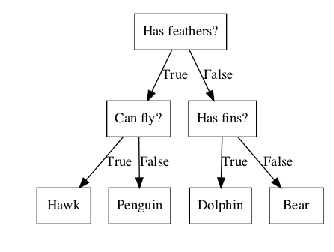

In [10]:
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal node (also called a leaf) that contains the answer. The edges connect the answers to a question with the next question you would ask. In machine learning parlance, we built a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn them from data using supervised learning.

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

The dataset consists of two half-moon shapes, with each class consisting of 75 data points. We will refer to this dataset as two_moons.

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

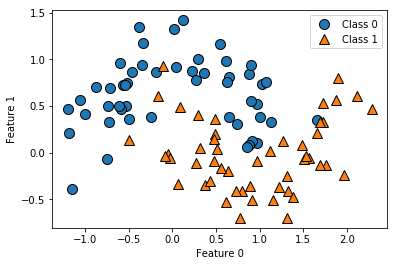

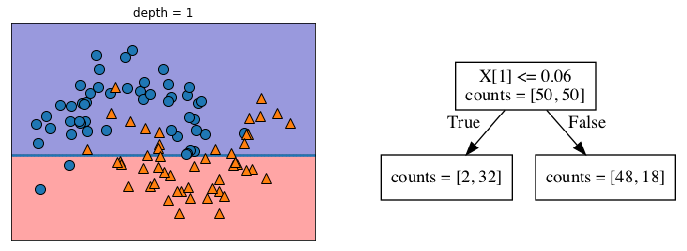

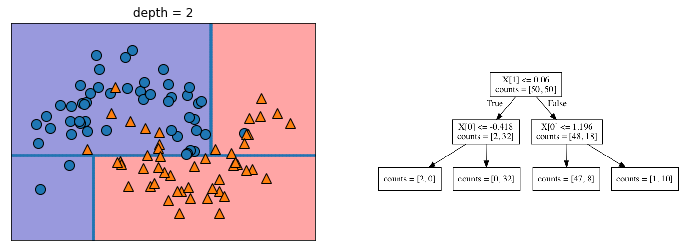

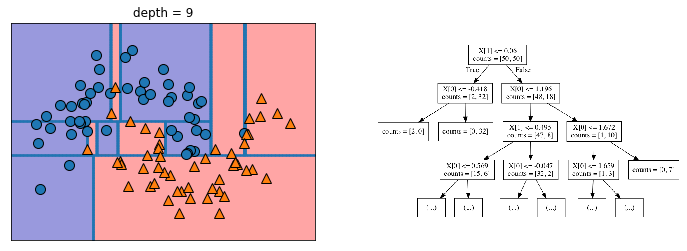

In [11]:
mglearn.plots.plot_tree_progressive()

The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the same target value is called pure. The final partitioning for this dataset is shown in
Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. The presence of pure leaves mean that a tree is 100% accurate on the training set; each data point in the training set is in a leaf that has the correct majority class.


Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100% — because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

In [13]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [14]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

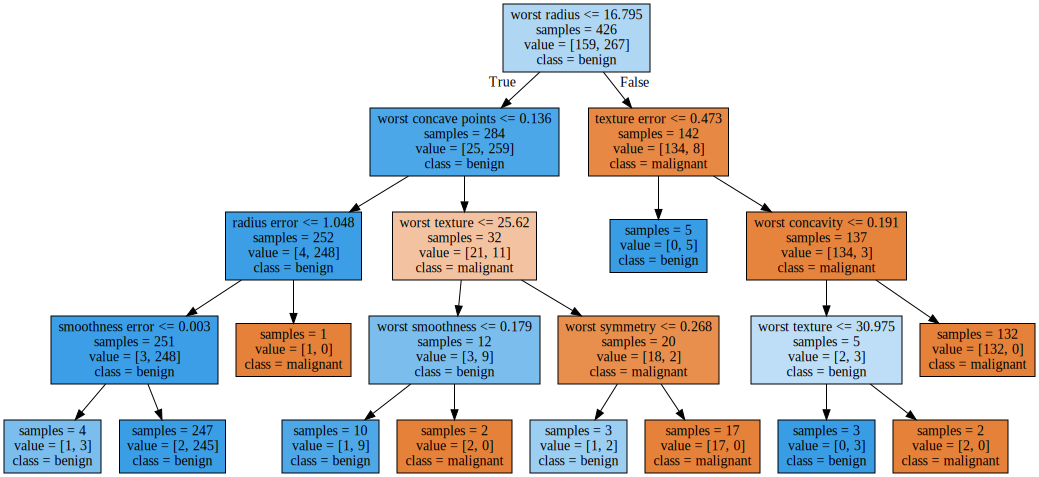

In [15]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importance in trees Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

In [16]:
print("Feature importances:")
print(tree.feature_importances_)

 

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


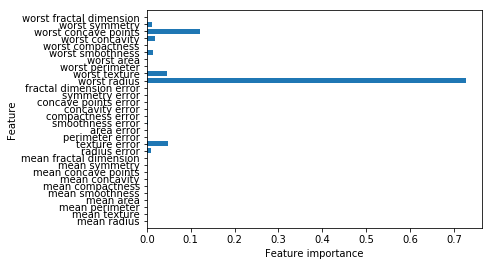

In [17]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)
